In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import os

mpl.rcParams['figure.dpi'] = 300

In [2]:
data = os.listdir("/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage")
data = [os.path.join("/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage", f) for f in data if f.endswith(".cov.gz")]

In [3]:
samples = {
    os.path.basename(filepath).split(".")[0]:filepath for filepath in data
}
samples

{'D5C1': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/D5C1.sorted.CALL.bam.cov.gz',
 'D2C1': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/D2C1.sorted.CALL.bam.cov.gz',
 'H4A4': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/H4A4.sorted.CALL.bam.cov.gz',
 'D4B4_50G': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/D4B4_50G.sorted.CALL.bam.cov.gz',
 'H5A2': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/H5A2.sorted.CALL.bam.cov.gz',
 'D3A3_50G': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/D3A3_50G.sorted.CALL.bam.cov.gz',
 'H3C4_50G': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/H3C4_50G.sorted.CALL.bam.cov.gz',
 'H5A2_50G': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/H5A2_50G.sorted.CALL.bam.cov.gz',
 'H5C2_50G': '/media/urbe/MyBDrive1/Antoine/27-10-21_VariantCalling_MA/coverage/H5C2_50G.sorted.CALL.bam.cov.gz',
 'H3A4

In [4]:
histograms = {}

covdata = {
    "sample":[],
    "mean":[],
    "median":[],
    "std":[],
    "max":[],
    "mode":[],
    "var":[]
}

for k, v in samples.items() :
    
    if k in histograms.keys() :
        continue
        
    cov = pd.read_csv(v, sep="\t", compression="gzip", usecols=range(3), names=["ref", "pos", "cov"], header=None,
                      skiprows=1,
                      dtype={"ref":"category", "pos":"uint", "cov":"uint"})
    bins, edges = np.histogram(cov["cov"], bins=np.arange(0,800,2))
    histograms[k] = (bins, edges)
    
    sample = os.path.basename(v).split(".")[0]
    print(sample)
    maxv = np.max(cov["cov"])
    meanv = np.mean(cov["cov"])
    modev = ss.mode(cov["cov"], axis=0, keepdims=False)
    print(modev.mode)
    medianv = np.median(cov["cov"])
    stdv = np.std(cov["cov"])
    varv = np.var(cov["cov"])
    
    print("max=", maxv)
    print("mean=", meanv)
    print("mode=", modev)
    print("median=", medianv)
    print("stdv=", stdv)
    print("var=", varv)
    
    covdata["sample"].append(sample)
    covdata["mean"].append(meanv)
    covdata["median"].append(medianv)
    covdata["max"].append(maxv)
    covdata["std"].append(stdv)
    covdata["var"].append(varv)
    covdata["mode"].append(modev.mode)
    
    print("===\n")

df_covdata = pd.DataFrame().from_dict(covdata)
df_covdata

D5C1
122
max= 8346
mean= 113.42221987227194
mode= ModeResult(mode=122, count=2207556)
median= 120.0
stdv= 34.55598897866981
var= 1194.1163742939493
===

D2C1
111
max= 6729
mean= 106.93208970314336
mode= ModeResult(mode=111, count=2145638)
median= 110.0
stdv= 35.127652463505264
var= 1233.9519675968072
===

H4A4
0
max= 17939
mean= 393.56961220900865
mode= ModeResult(mode=0, count=1020627)
median= 409.0
stdv= 130.9646674987666
var= 17151.74413306249
===

D4B4_50G
180
max= 11413
mean= 165.7142981389465
mode= ModeResult(mode=180, count=1698050)
median= 176.0
stdv= 50.536679220057714
var= 2553.9559465910133
===

H5A2
55
max= 3441
mean= 52.253994958464
mode= ModeResult(mode=55, count=3118380)
median= 54.0
stdv= 18.836071567954207
var= 354.7975921130929
===

D3A3_50G
182
max= 11261
mean= 167.01921226188455
mode= ModeResult(mode=182, count=1680821)
median= 177.0
stdv= 50.13039817157103
var= 2513.0568208402524
===

H3C4_50G
114
max= 7037
mean= 104.69887401146869
mode= ModeResult(mode=114, count=

,sample,mean,median,std,max,mode,var
0,D5C1,113.422220,120.0,34.555989,8346,122,1194.116374
1,D2C1,106.932090,110.0,35.127652,6729,111,1233.951968
2,H4A4,393.569612,409.0,130.964667,17939,0,17151.744133
3,D4B4_50G,165.714298,176.0,50.536679,11413,180,2553.955947
4,H5A2,52.253995,54.0,18.836072,3441,55,354.797592
5,D3A3_50G,167.019212,177.0,50.130398,11261,182,2513.056821
6,H3C4_50G,104.698874,111.0,32.105140,7037,114,1030.740016
7,H5A2_50G,60.395487,63.0,19.780621,4124,65,391.272969
8,H5C2_50G,155.697156,165.0,46.163032,10366,170,2131.025481
9,H3A4_50G,140.562988,150.0,44.672337,9289,0,1995.617702


In [5]:
df_covdata_reorder = df_covdata[["sample", "max", "mean", "mode", "median", "var", "std"]]
df_covdata_reorder.sort_values(by="sample")

,sample,max,mean,mode,median,var,std
34,D2A1,2638,45.860435,48,47.0,257.501377,16.046849
20,D2B3,15021,249.716188,271,264.0,4827.495440,69.480180
35,D2B3_50G,23674,379.193854,419,408.0,11273.923943,106.178736
1,D2C1,6729,106.932090,111,110.0,1233.951968,35.127652
30,D2C1_50G,8559,129.655392,141,137.0,1576.003937,39.698916
27,D2C3,6542,100.898788,109,106.0,977.998833,31.272973
17,D2C3_50G,7116,111.417360,120,118.0,1198.344819,34.617117
22,D3A1,2791,47.629285,51,49.0,274.560393,16.569864
19,D3A3,6428,99.090162,107,105.0,937.117797,30.612380
5,D3A3_50G,11261,167.019212,182,177.0,2513.056821,50.130398


In [12]:
print(str(df_covdata_reorder.sort_values(by="sample")[["sample", "median"]]))

      sample  median
34      D2A1    47.0
20      D2B3   264.0
35  D2B3_50G   408.0
1       D2C1   110.0
30  D2C1_50G   137.0
27      D2C3   106.0
17  D2C3_50G   118.0
22      D3A1    49.0
19      D3A3   105.0
5   D3A3_50G   177.0
32      D4A3    54.0
10      D4B4   144.0
3   D4B4_50G   176.0
24      D5B3    73.0
0       D5C1   120.0
12  D5C1_50G   127.0
25      D5C3   156.0
26  D5C3_50G   194.0
16      H2A3   449.0
31      H2B4   122.0
18  H2B4_50G    27.0
11      H2C3   148.0
21      H3A4    90.0
9   H3A4_50G   150.0
36      H3C4   127.0
6   H3C4_50G   111.0
2       H4A4   409.0
15  H4A4_50G   404.0
28      H4C2   204.0
4       H5A2    54.0
7   H5A2_50G    63.0
23      H5A3   202.0
13      H5A4   126.0
29  H5A4_50G   131.0
33      H5C2   148.0
8   H5C2_50G   165.0
14  ancestor   341.0


### Back-up data

In [6]:
import pickle
import bz2

with bz2.BZ2File('coverage_histograms_MA.pkl.bz2', 'wb') as f:
    pickle.dump(histograms, f)

### Read data (faster)

In [7]:
histograms_pickle = None
with bz2.BZ2File("coverage_histograms_MA.pkl.bz2", "rb") as f:
    histograms_pickle = pickle.load(f)

### Plot

In [17]:
# First H then D
# First 1 2 3 4
# Then A B C
# So H1C4 before H2A1

samples_infor = { # format = sample : (color, is_50gen, median) 
    "ancestor":((0.7,0.7,0.7,0.8), False, 341.0),
    
    "H2A3":((0,0,1.0,0.6), False, 449.0),
    
    "H2B4_50G":((0,0,1.0,0.3), True, 27.0),
    "H2B4":((0,0,1.0,0.6), False, 122.0),

    "H2C3":((0,0,1.0,0.6), False, 148.0),
    
    "H3A4_50G":((0,0,1.0,0.3), True, 150.0),
    "H3A4":((0,0,1.0,0.6), False, 90.0),
    
    "H3C4_50G":((0,0,1.0,0.3), True, 111.0),
    "H3C4":((0,0,1.0,0.6), False, 127.0),
    
    "H4A4_50G":((0,0,1.0,0.3), True, 404.0),
    "H4A4":((0,0,1.0,0.6), False, 409.0),
    
    "H4C2":((0,0,1.0,0.6), False, 204.0),
    
    "H5A2_50G":((0,0,1.0,0.3), True, 63.0),
    "H5A2":((0,0,1.0,0.6), False, 54.0),
    
    "H5A3":((0,0,1.0,0.6), False, 202.0),
    
    "H5A4_50G":((0,0,1.0,0.3), True, 131.0),
    "H5A4":((0,0,1.0,0.6), False, 126.0),
    
    "H5C2_50G":((0,0,1.0,0.3), True, 165.0),
    "H5C2":((0,0,1.0,0.6), False, 148.0),
    
    "D2A1":((1.0,0.55,0.0,0.6), False, 47.0),
    
    "D2B3_50G":((1.0,0.55,0.0,0.3), True, 408.0),
    "D2B3":((1.0,0.55,0.0,0.6), False, 264.0),
    
    "D2C1_50G":((1.0,0.55,0.0,0.3), True, 137.0),
    "D2C1":((1.0,0.55,0.0,0.6), False, 110.0),
    
    "D2C3_50G":((1.0,0.55,0.0,0.3), True, 118.0),
    "D2C3":((1.0,0.55,0.0,0.6), False, 106.0),
    
    "D3A1":((1.0,0.55,0.0,0.6), False, 49.0),
    
    "D3A3_50G":((1.0,0.55,0.0,0.3), True, 177.0),
    "D3A3":((1.0,0.55,0.0,0.6), False, 105.0),
    
    "D4A3":((1.0,0.55,0.0,0.6), False, 54.0),
    
    "D4B4_50G":((1.0,0.55,0.0,0.3), True, 176.0),
    "D4B4":((1.0,0.55,0.0,0.6), False, 144.0),
    
    "D5B3":((1.0,0.55,0.0,0.6), False, 73.0),
    
    "D5C1_50G":((1.0,0.55,0.0,0.3), True, 127.0),
    "D5C1":((1.0,0.55,0.0,0.6), False, 120.0),
    
    "D5C3_50G":((1.0,0.55,0.0,0.3), True, 194.0),
    "D5C3":((1.0,0.55,0.0,0.6), False, 156.0),
}

In [18]:
def violinplot_from_hist(ax, bins, edges, pos, width, median, color=(1.0,0,0.5,1.0), linestyle="-") :
    
    # 1. scale y-data (bins) between pos +/- 0.5*width
    bins_norm = (bins / np.max(bins)) * (width/2)
    bins_right = bins_norm + pos
    bins_left = bins_right - (2*bins_norm)
    bins_right += 0.01
    bins_left -= 0.01
    
    #print(bins_right)
    
    #ax.plot(bins_right, edges[:-1], color="k", lw=0.5, zorder=10, linestyle=linestyle)
    #ax.plot(bins_left, edges[:-1], color="k", lw=0.5, zorder=10, linestyle=linestyle)
    
    # violinplot
    linecolor = (0,0,0,0.8)
    ax.fill_betweenx(edges, bins_left-0.02, bins_right+0.02, zorder=5, fc=color, ec=linecolor, linestyle=linestyle, lw=0.4)
    
    # median
    ax.plot([pos-(width/2)+0.01, pos+(width/2)-0.01], [median, median], color="r", lw=1.0, zorder=10)

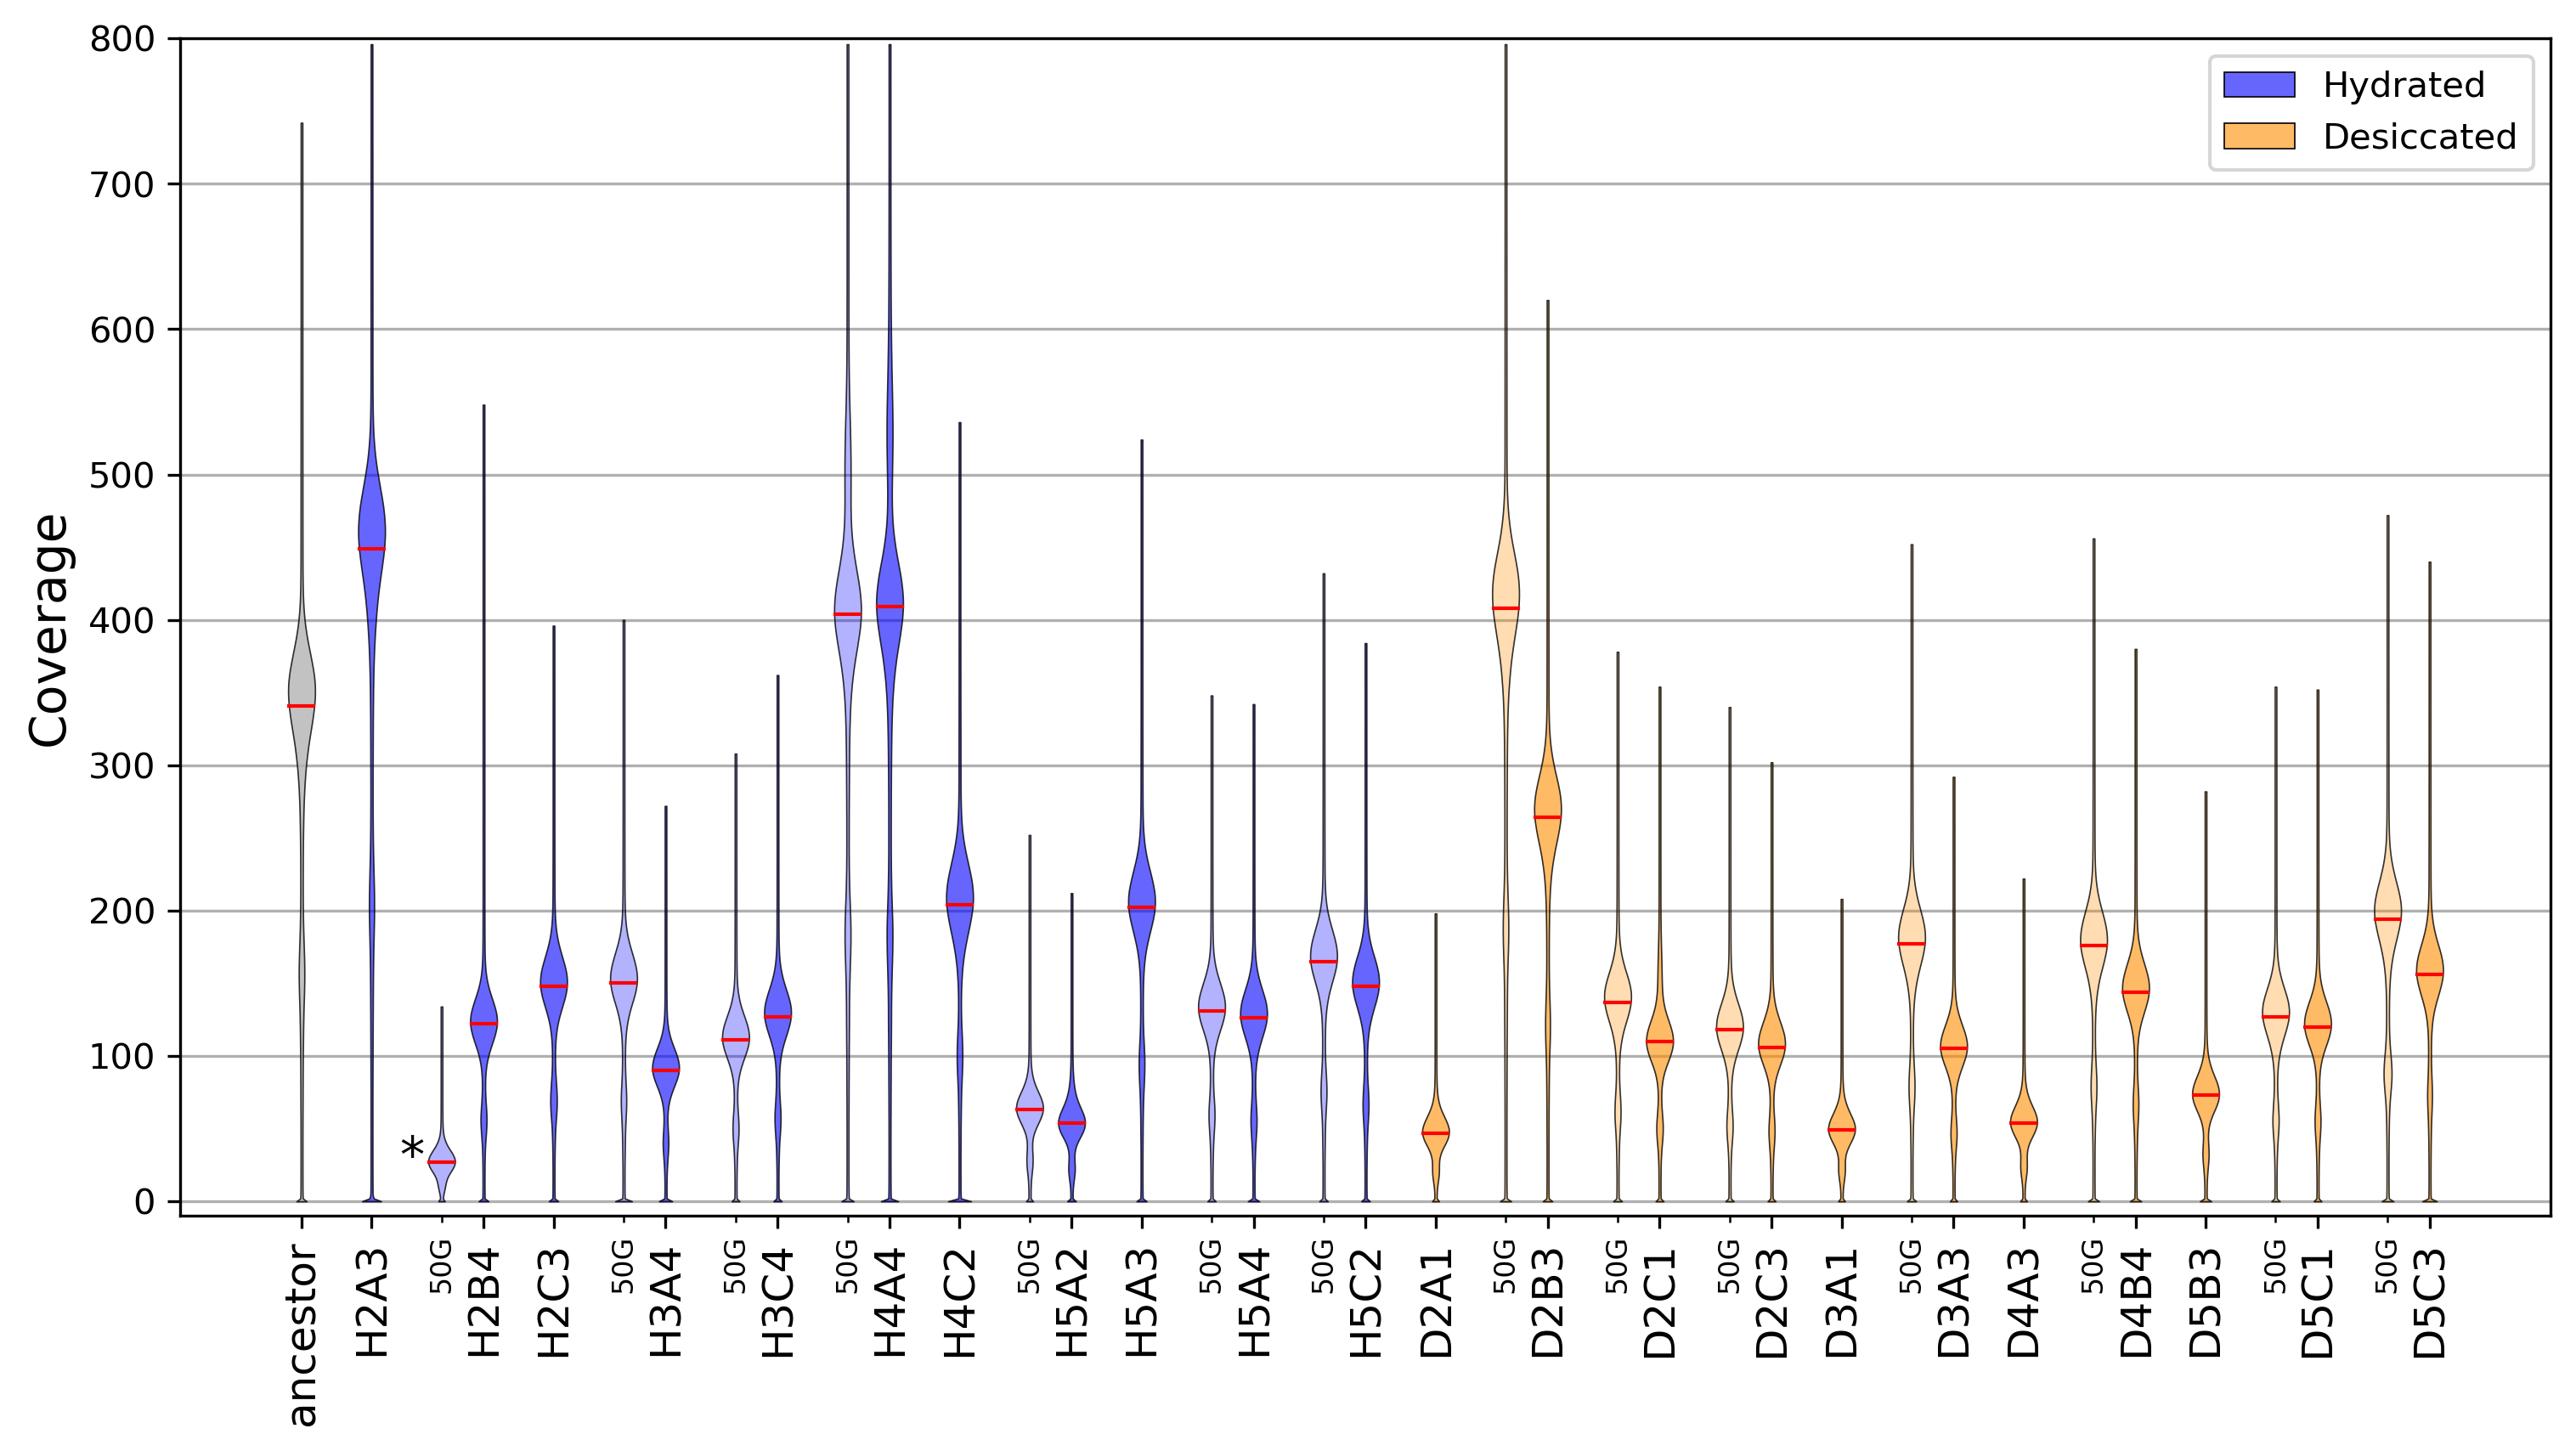

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

labels = []
labels_positions = []
minor_labels = []
minor_labels_positions = []

p = 0
for sm, info in samples_infor.items() :
    
    color = info[0]
    is_50gen = info[1]
    
    h = histograms_pickle[sm]
    bins, edges = h[0], h[1]
    
    median = info[2]
    
    width = 0.9
    space = 1.5
    space_sample = 2.5
    
    nb, ne = [], []
    for i, j in zip(bins, edges[:-1]) :
        if i >= 1000 :
            nb.append(i)
            ne.append(j)
    
    nb = np.array(nb)
    ne = np.array(ne)
    
    violinplot_from_hist(ax, nb, ne, p, width, median, color=color)
    if not is_50gen :
        labels_positions.append(p)
        labels.append(sm)
        p += space_sample
    else :
        minor_labels.append("50G")
        minor_labels_positions.append(p)
        p += space

ax.set_ylim(-10,800)
ax.grid(axis="y", zorder=-1)
ax.set_ylabel("Coverage", fontsize=14)

ax.set_xticks(labels_positions)
ax.set_xticklabels(labels, rotation="vertical", fontsize=12)

ax.set_xticks(minor_labels_positions, minor=True)
ax.set_xticklabels(minor_labels, rotation="vertical", minor=True, fontsize=8)

ax.text(x=3.5, y=20, s="*", fontsize=14)

legend_elements = (
    Patch(facecolor=(0,0,1.0,0.6), lw=0.4, ec="k", label="Hydrated"),
    Patch(facecolor=(1.0,0.55,0.0,0.6), lw=0.4, ec="k", label="Desiccated"),
)

ax.legend(handles=legend_elements, loc="upper right")

plt.show()